In [5]:
from models import baseline
import torch

In [2]:
model = baseline()

In [3]:
print(model)

baseline(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [11]:
for p in model.parameters():
    print(p.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])
torch.Size([32, 16, 3, 3])
torch.Size([32])
torch.Size([64, 32, 3, 3])
torch.Size([64])
torch.Size([32, 64, 3, 3])
torch.Size([32])
torch.Size([16, 32, 3, 3])
torch.Size([16])
torch.Size([128, 576])
torch.Size([128])
torch.Size([64, 128])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


In [1]:
from models import resnet,se_resnet

res = resnet()
se_res = se_resnet()

print(res)

c:\Users\palas\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\palas\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


resnet(
  (pretrained_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
  

In [9]:
saved_model_path = 'models\\resnet.pth'
checkpoint = torch.load(saved_model_path)
res = resnet()
res.load_state_dict(checkpoint)

c:\Users\palas\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\palas\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [16]:
res.pretrained_model.conv1

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [19]:
se_res.conv1 = res.pretrained_model.conv1
se_res.bn1 = res.pretrained_model.bn1
se_res.relu = res.pretrained_model.relu
se_res.maxpool = res.pretrained_model.maxpool
se_res.layer1 = res.pretrained_model.layer1
se_res.layer2 = res.pretrained_model.layer2
se_res.layer3 = res.pretrained_model.layer3
se_res.layer4 = res.pretrained_model.layer4
se_res.avgpool = res.pretrained_model.avgpool

In [52]:
import torch

y = torch.randint(1,4, (1,4)).float()
y.requires_grad = True

x = torch.randint(1,4, (1,4)).float()
x.requires_grad = True

In [54]:
dot_product = x @ y.T
dot_product.backward()

x = x - x.grad
y = y - y.grad

In [55]:
x.grad.zero_()
y.grad.zero_()


C:\Users\palas\AppData\Local\Temp\ipykernel_2000\3626588079.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:485.)
  x.grad.zero_()


AttributeError: 'NoneType' object has no attribute 'zero_'

In [68]:
for i in res.pretrained_model.named_parameters():
    print(i)

('conv1.weight', Parameter containing:
tensor([[[[-1.2735e-01, -6.0424e-02, -1.3480e-02,  ...,  3.6966e-02,
           -1.0932e-02,  5.6710e-02],
          [-3.8967e-02, -8.8033e-03, -2.9508e-02,  ..., -9.3505e-02,
           -9.5155e-02,  1.3298e-02],
          [-3.2169e-02, -6.5507e-02, -8.0084e-02,  ..., -9.6609e-02,
            4.3426e-02,  1.8157e-01],
          ...,
          [-1.7671e-01, -1.6588e-01, -3.9171e-01,  ..., -6.4569e-01,
           -2.5032e-01, -5.8571e-02],
          [ 4.5420e-02,  5.8140e-02, -3.4051e-02,  ..., -3.3242e-01,
           -2.1876e-01, -1.6335e-01],
          [ 1.6177e-01,  1.9265e-01,  1.6138e-01,  ...,  2.4337e-01,
            2.6890e-01,  1.7663e-01]],

         [[ 7.5989e-02,  9.5823e-02,  1.0971e-01,  ...,  4.6495e-02,
            1.8487e-02,  6.9147e-02],
          [ 9.9387e-02,  1.0210e-01,  5.3293e-02,  ..., -1.4047e-01,
           -1.4331e-01, -2.3387e-02],
          [ 1.7870e-01,  1.0650e-01,  9.5527e-02,  ..., -3.4257e-02,
            7.8992e

In [11]:
import requests

resp = requests.post("http://127.0.0.1:5000/occlusion_res")
print(resp.text)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>500 Internal Server Error</title>
<h1>Internal Server Error</h1>
<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.</p>



In [10]:
import numpy as np

X = np.zeros((256,256))
X = np.stack([X,X,X],axis=2)
X.shape

(256, 256, 3)

In [2]:
from torchviz import make_dot
import torch
from models import resnet, baseline

saved_model_path = 'models\\models_petimages\\resnet.pth'
checkpoint = torch.load(saved_model_path)
res = resnet(2)
res.load_state_dict(checkpoint)
res.eval()  # Set the model to evaluation mode

# y = res(torch.randint(0, 255, (1, 3, 256, 256)).float())

# graph = make_dot(y, params=dict(list(res.named_parameters())))
# graph.render("computation_graph", format="png")


c:\Users\palas\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\palas\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


resnet(
  (pretrained_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
  

In [7]:
print(res)

resnet(
  (pretrained_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
  

In [14]:
print(res.pretrained_model.layer1[0].conv1)

Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)


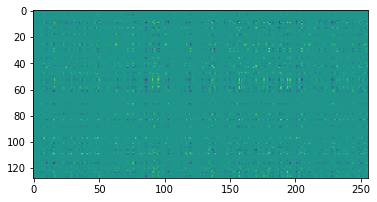

In [29]:
import matplotlib.pyplot as plt

plt.imshow(res.pretrained_model.layer2[0].conv1.weight.squeeze(3).squeeze(2).cpu().data)

In [57]:
total_layers = 0

for name, param in res.pretrained_model.named_parameters():
    if param.requires_grad and 'conv' in name and '0' not in name:
        print(getattr(res.pretrained_model ,name[:-7]))
        total_layers += 1

print(total_layers)

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)


AttributeError: 'ResNet' object has no attribute 'layer1.1.conv1'

In [65]:
from models import densenet

checkpoint = torch.load("models\\models_petimages\\densenet.pth")
model = densenet(2)
model.load_state_dict(checkpoint)
model.eval()

<class 'models.densenet'>


In [66]:
print(model)

densenet(
  (pretrained_model): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, mo

In [76]:
res.pretrained_model.layer1[0]

Bottleneck(
  (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (downsample): Sequential(
    (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

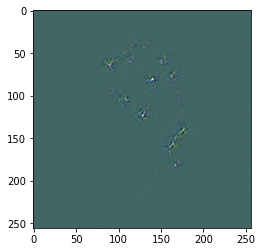

In [156]:
from torchvision import transforms
import cv2

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256,256)),
    transforms.ToTensor()
])

img = transform(cv2.imread("sample_images\\dog_1.jpg"))
img = img.unsqueeze(0)
img.requires_grad_()

checkpoint = torch.load("models\\models_petimages\\resnet.pth")
model = resnet(2)
model.load_state_dict(checkpoint)

target_layer = model.pretrained_model.layer4[2].relu
guided_backprop = GuidedBackprop(res, target_layer)
guided_backprop(img, 1)

X = guided_backprop.guided_backpropagation().permute(1,2,0).cpu().data
for d in range(3):
    X[:,:,d] = (X[:,:,d] - X[:,:,d].min()) / (X[:,:,d].max() - X[:,:,d].min())
plt.imshow(guided_backprop.gradients.permute(1,2,0).cpu().data)


In [137]:
model.pretrained_model.layer4[2].relu
model.pretrained_model.layer3[22].relu
model.pretrained_model.layer2[3].relu
model.pretrained_model.layer1[2].relu
model.pretrained_model.relu

ReLU(inplace=True)

In [151]:
class GuidedBackprop:
    def __init__(self, model, target_layer):
        self.model = model
        self.gradients = None
        self.target_layer = target_layer
        # Attach the hook to ReLU modules
        self.attach_hooks()

    def attach_hooks(self):
        def hook_fn(module, grad_input, grad_output):
            if isinstance(module, torch.nn.ReLU):
                return (torch.clamp(grad_input[0], min=0.0),)

        # Register the hook
        # self.hook_handles = []
        # for layer in self.model.children():
        handle = self.target_layer.register_backward_hook(hook_fn)

    def remove_hooks(self):
        for handle in self.hook_handles:
            handle.remove()

    def __call__(self, input_image, target_class):
        self.model.zero_grad()
        output = self.model(input_image)
        
        one_hot_output = torch.zeros_like(output)
        one_hot_output[0][target_class] = 1
        output.backward(gradient=one_hot_output)

        gradients = input_image.grad.clone()
        self.gradients = gradients.squeeze()
        input_image.grad.zero_()

    def guided_backpropagation(self):
        return self.gradients


In [3]:
print(res)

resnet(
  (pretrained_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
  

In [5]:
import torch.nn as nn
nn.Sequential(*list(res.children())[:-3])

Sequential()

In [48]:
list(res.pretrained_model.children())[:-3][-1][2]

Bottleneck(
  (conv1): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn3): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
)

In [67]:
nn.Sequential(*list(res.pretrained_model.children())[:-3])[-1][-1].relu

ReLU(inplace=True)

In [189]:
from models import baseline
from torchvision import transforms
import cv2
import torch.nn.functional as F
import torch.nn as nn

GRAD_CAM_GRAD = 0
GRAD_CAM_FMAP = 0

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256,256)),
    transforms.ToTensor()
])

model_path = "models\\models_mnist\\baseline.pth"
image_path = "sample_images\\mnist_5.jpg"

checkpoint = torch.load(model_path)
model = baseline(10)
model.load_state_dict(checkpoint)
model.eval()

label = 5
labels = 10

plt.figure(figsize=(20,10))

img = transform(cv2.imread(image_path))
img = img.unsqueeze(0)
img.requires_grad_()

target_layer = layers[0]
target_layer.register_backward_hook(grad_cam_backward)
target_layer.register_forward_hook(grad_cam_forward)

output_1 = model(img).squeeze(0)
output[label].backward()
plt.imshow()


img.zero_grad()
img.requires_grad_()
output_2 = model(img).squeeze(0)
output_2.backward(gradient(torch.eye(labels))[label])

c:\Users\palas\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\module.py:1113: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


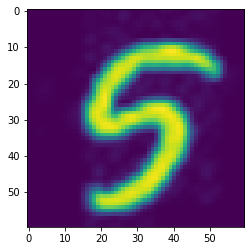

In [190]:
import matplotlib.pyplot as plt

plt.imshow((GRAD_CAM_sigmoid * GRAD_CAM_FMAP.permute(1,2,0)).sum(2).cpu().data)

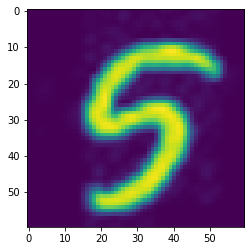

In [191]:
plt.imshow((GRAD_CAM_softmax * GRAD_CAM_FMAP.permute(1,2,0)).sum(2).cpu().data)